WBCD Dataset Neural Network 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import time 

import matplotlib.pyplot as plt

# from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.cluster import KMeans
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
from scipy.stats import kurtosis

from textwrap import wrap

### Import more Libraries


In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

### Load Dataset

In [3]:
RANDOM_SEED = 25

df = pd.read_csv('../datasets/us_income/adult-train.csv', delimiter=',', quotechar='"')


### Dataframe without Preprocessing 

In [4]:
print("Printing dataframe head (without any preprocessing)....")
print(df.head(10))

Printing dataframe head (without any preprocessing)....
   Age     Workclass  Fnlwgt      Education  EducationNum  \
0   34   Federal-gov   67083      Bachelors            13   
1   72   Federal-gov   39110           11th             7   
2   45   Federal-gov  235891     Assoc-acdm            12   
3   26   Federal-gov  206983    Prof-school            15   
4   31   Federal-gov  139455      Bachelors            13   
5   27   Federal-gov  196386     Assoc-acdm            12   
6   19   Federal-gov  255921   Some-college            10   
7   60   Federal-gov   27466   Some-college            10   
8   59   Federal-gov  212448        HS-grad             9   
9   32   Federal-gov  148138      Bachelors            13   

         MaritalStatus          Occupation    Relationship  \
0        Never-married     Exec-managerial       Unmarried   
1             Divorced        Adm-clerical   Not-in-family   
2        Never-married        Adm-clerical   Not-in-family   
3   Married-civ-spouse  

### Dataset Preprocessing 

In [5]:
df.replace(' <=50K', 0, inplace=True)
df.replace(' >50K', 1, inplace=True)

df = pd.get_dummies(df)
# print(df.head(5))

X = df.loc[:, df.columns != 'Income']
y = df['Income']



In [6]:
normalized_df=(df-df.mean())/df.std()
print(normalized_df.head(10))
# X_normalized = normalized_df.loc[:, normalized_df.columns != 'Income']
X = normalized_df.loc[:, normalized_df.columns != 'Income']


        Age    Fnlwgt  EducationNum  CapitalGain  CapitalLoss  HoursPerWeek  \
0 -0.337877 -1.161452      1.128900     0.051171    -0.218582     -0.077733   
1  2.555231 -1.426215     -1.224046    -0.147442    -0.218582     -2.748855   
2  0.499601  0.436307      0.736742    -0.147442    -0.218582     -0.077733   
3 -0.946952  0.162695      1.913215    -0.147442    -0.218582      1.591718   
4 -0.566280 -0.476455      1.128900    -0.147442    -0.218582     -0.077733   
5 -0.870818  0.062395      0.736742     0.401276    -0.218582     -0.077733   
6 -1.479893  0.625890     -0.047573    -0.147442    -0.218582     -1.747184   
7  1.641618 -1.536425     -0.047573    -0.147442    -0.218582     -0.077733   
8  1.565483  0.214421     -0.439731    -0.147442    -0.218582     -0.077733   
9 -0.490146 -0.394270      1.128900    -0.147442     4.733206     -0.077733   

     Income  Workclass_ Federal-gov  Workclass_ Local-gov  Workclass_ Private  \
0 -0.575682                5.566339             -

### Apply ICA

In [12]:
n_comp_list = [x for x in range(5, 75, 5)]

train_err = list()
test_err = list()

n_components = 10

ica = FastICA(n_components=n_components,whiten=True,algorithm='parallel')
ica = ica.fit(X)
X_dim_reduced = ica.transform(X)


# # Split into 30%  training data, 70% testing data
X_train, X_test, y_train, y_test = train_test_split(X_dim_reduced, y,
                                                    test_size=0.30, random_state=RANDOM_SEED)



In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21113, 10)
(9049, 10)
(21113,)
(9049,)


training_set_max_size: 21113 

activation: relu
learning a neural net with training_set_size=2111
getting data
building net
training
validating
train_err: 0.1643770724774988
test_err: 0.1752723827569872
---
activation: relu
learning a neural net with training_set_size=4222
getting data
building net
training
validating
train_err: 0.167693036475604
test_err: 0.17574609189957366
---
activation: relu
learning a neural net with training_set_size=6333
getting data
building net
training
validating
train_err: 0.1732196431391126
test_err: 0.17258803094899733
---
activation: relu
learning a neural net with training_set_size=8444
getting data
building net
training
validating
train_err: 0.1706537186167693
test_err: 0.16781146376125058
---
activation: relu
learning a neural net with training_set_size=10555
getting data
building net
training
validating
train_err: 0.17025106584557081
test_err: 0.16941098463918666
---
activation: relu
learning a neural net with training_set_size=12666
getting data
bui

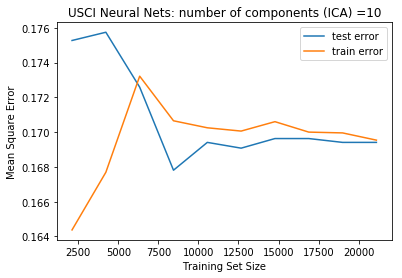

plot complete
Time taken for training:  28.247493505477905


In [14]:
# NNClassifier
train_size = len(X_train)
offsets = range(int(0.1 * train_size), int(train_size), int(0.1 * train_size))

start_time = time.time()

train_err = [0] * len(offsets)
test_err = [0] * len(offsets)

print('training_set_max_size:', train_size, '\n')

activation_functions = ['relu']

start_time = time.time()

for activation in activation_functions:
    for i, o in enumerate(offsets):
        print('activation: ' + activation)
        print('learning a neural net with training_set_size=' + str(o))
        print('getting data'),
        X_train_temp = X_train[:o].copy()
        y_train_temp = y_train[:o].copy()
        X_test_temp = X_test[:o].copy()
        y_test_temp = y_test[:o].copy()
        print('building net'),
        mlp = MLPClassifier(activation=activation, alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           # hidden_layer_sizes=(50, 25, 12),
           hidden_layer_sizes=(13, 13, 13),
           learning_rate='constant',
           learning_rate_init=0.001, max_iter=500, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1)
        print('training'),
        mlp.fit(X_train,y_train)
        print('validating')
        train_err[i] = mean_squared_error(y_train_temp,
                    mlp.predict(X_train_temp))
        test_err[i] = mean_squared_error(y_test_temp,
                    mlp.predict(X_test_temp))

        # print(classification_report(y_train, mlp.predict(X_train)))
        # print(classification_report(y_test, mlp.predict(X_test)))

        print('train_err: ' + str(train_err[i]))
        print('test_err: ' + str(test_err[i]))
        print('---')

    # Plot results
    print('plotting results')
    plt.figure()
    title = 'USCI Neural Nets: number of components (ICA) =' + str(n_components) 
    plt.title('\n'.join(wrap(title,60)))
    # plt.subplots_adjust(top=0.85)
    plt.plot(offsets, test_err, '-', label='test error')
    plt.plot(offsets, train_err, '-', label='train error')
    plt.legend()
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Square Error')
    filename = 'wbcd' + activation + '_PerformancexTrainingSetSize.png'
    plt.show()
#     plt.savefig('plots/WBCD/NN/' + filename)
    print('plot complete')
    ### ---
    
end_time = time.time()

print("Time taken for training: ", end_time - start_time) 

plotting results


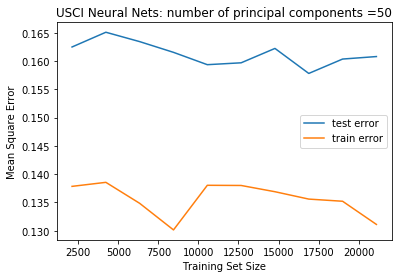

plot complete


In [10]:
n_components = 50

# Plot results
print('plotting results')
plt.figure()
title = 'USCI Neural Nets: number of principal components =' + str(n_components) 
plt.title('\n'.join(wrap(title,60)))
# plt.subplots_adjust(top=0.85)
plt.plot(offsets, test_err, '-', label='test error')
plt.plot(offsets, train_err, '-', label='train error')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('Mean Square Error')
filename = 'wbcd' + activation + '_PerformancexTrainingSetSize.png'
plt.show()
#     plt.savefig('plots/WBCD/NN/' + filename)
print('plot complete')
### ---